In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def sdv_snow(snow_rstr):
    
    # open a geotiff
    src = rasterio.open(snow_rstr)
    
    # pull the metadata - needed to write a geotiff at the end
    meta = src.meta
    
    # use a numpy array to do the math
    snow = src.read(1)
    
    # mask out no data values just in case
    snow_ = np.ma.masked_array(snow, snow == src.nodatavals)
    
    mu = snow_.mean()
    sigma = snow_.std()
    sdv = (snow_ - mu) / sigma
    # sdv is a standarized snow depth value and enables comparison of relative snow depths in different years
    
    # Compare standarized and measured snow maps
    plt.imshow(sdv, cmap='pink')
    plt.title('Standardized Depth [m]')
    plt.colorbar()
    plt.figure()
    plt.imshow(snow_, cmap='pink')
    plt.title('Measured Depth [m]')
    plt.colorbar()
    # Plots should look identical - but have different values
    
    # Write it
    out_name = rasterio.writeoutput_name = os.path.basename( src.name ).replace( '.tif', '_sdv.tif' )
    with rasterio.open( out_name, 'w', **meta ) as out:
        out.write( sdv, 1 )

/home/cparr/anaconda/lib/python2.7/site-packages/rasterio/__init__.py:94: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


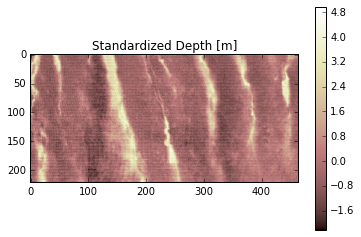

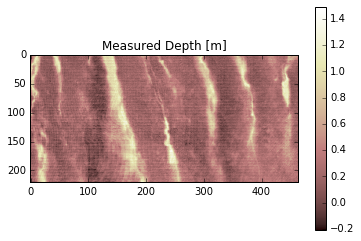

In [3]:
# Test it
sdv_snow(r'/home/cparr/drift_results/clip.tif')